<a href="https://colab.research.google.com/github/RavitejaKambhampati237/uber_data_analysis/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Load the CSV file
df = pd.read_csv('UberDataset.csv')

df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


##Data Cleaning

In [ ]:
df.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [ ]:
df.dtypes

,0
START_DATE,object
END_DATE,object
CATEGORY,object
START,object
STOP,object
MILES,float64
PURPOSE,object


##Handling Missing Value


In [ ]:
#drop the missing value
df.dropna(subset=['END_DATE'], inplace=True)
df.dropna(subset=['CATEGORY'], inplace=True)
df.dropna(subset=['START'], inplace=True)
df.dropna(subset=['STOP'], inplace=True)
# Fill missing 'PURPOSE' values with "Unknown"
df['PURPOSE'].fillna('Unknown', inplace=True)

<ipython-input-8-625a9f3054c3>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('Unknown', inplace=True)


##Data type conversion

In [ ]:
# Replace dashes with slashes to standardize the date format
df['START_DATE'] = df['START_DATE'].str.replace('-', '/', regex=False)
df['END_DATE'] = df['END_DATE'].str.replace('-', '/', regex=False)

# Now convert the columns to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%m/%d/%Y %H:%M', errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%m/%d/%Y %H:%M', errors='coerce')

# Check the first few rows to confirm
print(df[['START_DATE', 'END_DATE']].head())

           START_DATE            END_DATE
0 2016-01-01 21:11:00 2016-01-01 21:17:00
1 2016-01-02 01:25:00 2016-01-02 01:37:00
2 2016-01-02 20:25:00 2016-01-02 20:38:00
3 2016-01-05 17:31:00 2016-01-05 17:45:00
4 2016-01-06 14:42:00 2016-01-06 15:49:00


In [ ]:
df.dtypes

,0
START_DATE,datetime64[ns]
END_DATE,datetime64[ns]
CATEGORY,object
START,object
STOP,object
MILES,float64
PURPOSE,object


##Check unique values in 'CATEGORY' and 'PURPOSE' columns

In [ ]:
unique_categories = df['CATEGORY'].unique()
unique_purposes = df['PURPOSE'].unique()

print("Unique Categories:")
print(unique_categories)
print("\nUnique Purposes:")
print(unique_purposes)

Unique Categories:
['Business' 'Personal']

Unique Purposes:
['Meal/Entertain' 'Unknown' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


In [ ]:
# Check for duplicate rows in the entire DataFrame
duplicates = df.duplicated()
print(duplicates.sum())

1


In [ ]:
duplicate_row = df[df.duplicated()]
print(duplicate_row)

             START_DATE            END_DATE  CATEGORY   START  STOP  MILES  \
492 2016-06-28 23:34:00 2016-06-28 23:59:00  Business  Durham  Cary    9.9   

     PURPOSE  
492  Meeting  


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
summary_stats = df.describe()
print(summary_stats)

                          START_DATE                       END_DATE  \
count                           1154                           1154   
mean   2016-07-17 00:07:01.611784960  2016-07-17 00:30:16.117850880   
min              2016-01-01 21:11:00            2016-01-01 21:17:00   
25%              2016-03-31 20:23:30            2016-03-31 20:52:00   
50%              2016-07-21 17:29:30            2016-07-21 17:37:00   
75%              2016-10-27 21:16:15            2016-10-27 21:34:30   
max              2016-12-31 22:08:00            2016-12-31 23:51:00   
std                              NaN                            NaN   

             MILES  
count  1154.000000  
mean     10.567418  
min       0.500000  
25%       2.900000  
50%       6.000000  
75%      10.400000  
max     310.300000  
std      21.588452  


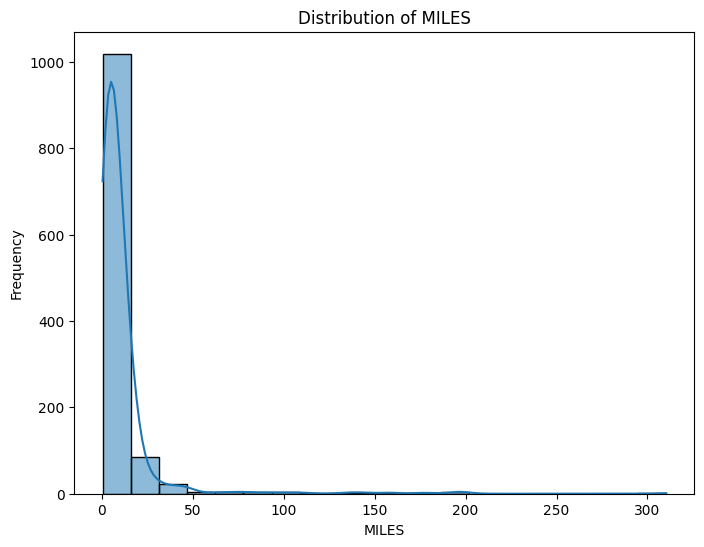

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of 'MILES' to check distribution and outliers
plt.figure(figsize=(8, 6))
sns.histplot(df['MILES'], bins=20, kde=True)
plt.xlabel('MILES')
plt.ylabel('Frequency')
plt.title('Distribution of MILES')
plt.show()

##Handling Outliers

In [ ]:
import plotly.express as px

# Calculate the Interquartile Range (IQR)
Q1 = df['MILES'].quantile(0.25)
Q3 = df['MILES'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a box plot using Plotly
fig_box = px.box(df, y='MILES', title='Box Plot of MILES Column')
fig_box.show()

# Step 4: Create a scatter plot using Plotly
fig_scatter = px.scatter(df, x=df.index, y='MILES', title='Scatter Plot of MILES Column with Outlier Boundaries')
fig_scatter.add_shape(type='line', x0=0, y0=lower_bound, x1=len(df)-1, y1=lower_bound, line=dict(color='red', dash='dash'))
fig_scatter.add_shape(type='line', x0=0, y0=upper_bound, x1=len(df)-1, y1=upper_bound, line=dict(color='red', dash='dash'))
fig_scatter.show()

In [ ]:
df_cleaned = df[(df['MILES'] >= lower_bound) & (df['MILES'] <= upper_bound)]

##Exploratory Data Analysis (EDA)

#A histogram to visualize the distribution of the "MILES" column, showing the frequency of different mileage values.

In [ ]:
#Histogram of the 'MILES' column
fig_histogram = px.histogram(df_cleaned, x='MILES', nbins=20, title='Distribution of MILES')
fig_histogram.show()

#A box plots to compare the distribution of "MILES" for different categories and purposes. This helps identify any differences in trip distances between business and personal trips or various purposes.

In [ ]:
#Box plot of 'MILES' by 'CATEGORY'
fig_box_category = px.box(df_cleaned, x='CATEGORY', y='MILES', title='Box Plot of MILES by CATEGORY')
fig_box_category.show()

In [ ]:
#Box plot of 'MILES' by 'PURPOSE'
fig_box_purpose = px.box(df_cleaned, x='PURPOSE', y='MILES', title='Box Plot of MILES by PURPOSE')
fig_box_purpose.show()

#A scatter plot of "MILES" against "START_DATE" to explore the relationship between trip distance and time. This allows you to observe any patterns or trends over time.

In [ ]:
#Scatter plot of 'MILES' against 'START_DATE'
fig_scatter_date = px.scatter(df_cleaned, x='START_DATE', y='MILES', title='Scatter Plot of MILES over time')
fig_scatter_date.show()

#A bar chart to display the count of trips for each category (business or personal) to understand the proportion of different trip types.

In [ ]:
#Bar chart of 'CATEGORY' counts
fig_bar_category = px.bar(df_cleaned, x='CATEGORY', title='Count of Trips by CATEGORY')
fig_bar_category.show()

##FEATURE ENGINEERING

In [ ]:
#Calculate the duration of each trip in minutes
df_cleaned['TRIP_DURATION_MINUTES'] = (df_cleaned['END_DATE'] - df_cleaned['START_DATE']).dt.total_seconds() / 60.0

<ipython-input-26-7866fbd9563c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_cleaned

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION_MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0
...,...,...,...,...,...,...,...,...
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,4.0
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0


In [ ]:
# Trip Duration in Hours
df_cleaned['TRIP_DURATION_HOURS'] = (df_cleaned['END_DATE'] - df_cleaned['START_DATE']).dt.total_seconds() / (60 * 60)

# Day of the Week
df_cleaned['DAY_OF_WEEK'] = df_cleaned['START_DATE'].dt.dayofweek
# Monday = 0, Tuesday = 1, ..., Sunday = 6

# Hour of the Day
df_cleaned['HOUR_OF_DAY'] = df_cleaned['START_DATE'].dt.hour

# Weekend vs. Weekday
df_cleaned['WEEKEND'] = df_cleaned['DAY_OF_WEEK'].isin([5, 6])  # Saturday and Sunday are weekends

# Feature Engineering: Trip Time of Day (Morning, Afternoon, Evening, Night)
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_cleaned['TIME_OF_DAY'] = df_cleaned['HOUR_OF_DAY'].apply(get_time_of_day)

<ipython-input-28-2d36aa97b1bc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-2d36aa97b1bc>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-2d36aa97b1bc>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-2d36aa9

In [ ]:
df_cleaned

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION_MINUTES,TRIP_DURATION_HOURS,DAY_OF_WEEK,HOUR_OF_DAY,WEEKEND,TIME_OF_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,0.100000,4,21,False,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,12.0,0.200000,5,1,True,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,0.216667,5,20,True,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,0.233333,1,17,False,Evening
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,0.066667,2,17,False,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,4.0,0.066667,4,23,False,Night
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,0.116667,5,1,True,Night
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,0.300000,5,13,True,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,0.583333,5,15,True,Afternoon


##Exploratory Data Analysis (EDA) 2

In [ ]:
# Distribution of Trip Duration (in hours)
fig_histogram_duration = px.histogram(df_cleaned, x='TRIP_DURATION_HOURS', nbins=20, title='Distribution of Trip Duration')
fig_histogram_duration.show()

# Day of the Week Analysis
df_day_of_week = df_cleaned.groupby('DAY_OF_WEEK')['TRIP_DURATION_HOURS'].count().reset_index()
df_day_of_week['DAY_OF_WEEK'] = df_day_of_week['DAY_OF_WEEK'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})
fig_bar_day_of_week = px.bar(df_day_of_week, x='DAY_OF_WEEK', y='TRIP_DURATION_HOURS', title='Trips by Day of the Week')
fig_bar_day_of_week.show()

In [ ]:
# Hourly Analysis
df_hourly = df_cleaned.groupby('HOUR_OF_DAY')['TRIP_DURATION_HOURS'].count().reset_index()
fig_bar_hourly = px.bar(df_hourly, x='HOUR_OF_DAY', y='TRIP_DURATION_HOURS', title='Trips by Hour of the Day')
fig_bar_hourly.show()

# Weekend vs. Weekday Comparison
df_weekend_weekday = df_cleaned.groupby('WEEKEND')['TRIP_DURATION_HOURS'].count().reset_index()
df_weekend_weekday['WEEKEND'] = df_weekend_weekday['WEEKEND'].map({True: 'Weekend', False: 'Weekday'})
fig_pie_weekend_weekday = px.pie(df_weekend_weekday, names='WEEKEND', values='TRIP_DURATION_HOURS', title='Weekend vs. Weekday Trips')
fig_pie_weekend_weekday.show()

In [ ]:
# Time of Day Analysis
df_time_of_day = df_cleaned['TIME_OF_DAY'].value_counts().reset_index()
df_time_of_day.columns = ['TIME_OF_DAY', 'COUNT']
fig_pie_time_of_day = px.pie(df_time_of_day, names='TIME_OF_DAY', values='COUNT', title='Trips by Time of Day')
fig_pie_time_of_day.show()

# Purpose of Trips
fig_bar_purpose = px.bar(df_cleaned, x='PURPOSE', title='Trips by Purpose')
fig_bar_purpose.show()

In [ ]:
# Correlation Analysis (Assuming 'MILES' is the numerical feature to analyze)
fig_scatter_matrix = px.scatter_matrix(df_cleaned, dimensions=['TRIP_DURATION_HOURS', 'MILES'], title='Correlation Analysis')
fig_scatter_matrix.show()

# Comparing Categories (Assuming 'CATEGORY' and 'PURPOSE' are categorical features to analyze)
fig_box_category_duration = px.box(df_cleaned, x='CATEGORY', y='TRIP_DURATION_HOURS', title='Trip Duration by Category')
fig_box_category_duration.show()

fig_box_purpose_duration = px.box(df_cleaned, x='PURPOSE', y='TRIP_DURATION_HOURS', title='Trip Duration by Purpose')
fig_box_purpose_duration.show()

In [ ]:
# Seasonal Analysis (Assuming 'START_DATE' is the datetime feature to analyze)
df_seasonal = df_cleaned.resample('M', on='START_DATE')['TRIP_DURATION_HOURS'].count().reset_index()
fig_line_seasonal = px.line(df_seasonal, x='START_DATE', y='TRIP_DURATION_HOURS', title='Seasonal Analysis')
fig_line_seasonal.show()

<ipython-input-34-a92d1b734a48>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
df_cleaned


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION_MINUTES,TRIP_DURATION_HOURS,DAY_OF_WEEK,HOUR_OF_DAY,WEEKEND,TIME_OF_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,0.100000,4,21,False,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,12.0,0.200000,5,1,True,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,0.216667,5,20,True,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,0.233333,1,17,False,Evening
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,0.066667,2,17,False,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,4.0,0.066667,4,23,False,Night
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,0.116667,5,1,True,Night
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,0.300000,5,13,True,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,0.583333,5,15,True,Afternoon


##MODELLING AND PREDICTIVE ANALYSIS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for non-numeric columns
non_numeric_columns = df_cleaned.select_dtypes(exclude=['number']).columns
print("Non-Numeric Columns:", non_numeric_columns)

# Handle non-numeric columns or convert them to numeric as needed

Non-Numeric Columns: Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE',
       'WEEKEND', 'TIME_OF_DAY'],
      dtype='object')


In [ ]:
# Drop any non-numeric or non-relevant columns that won't contribute to the model.
df_cleaned1 = df_cleaned.drop(columns=['START_DATE', 'END_DATE', 'CATEGORY','START', 'STOP','PURPOSE',
       'WEEKEND', 'TIME_OF_DAY'])

In [ ]:
# Separate features (X) and the target variable (y)
X = df_cleaned1.drop(columns=['MILES'])  # Features
y = df_cleaned1['MILES']  # Target variable

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 13.07
R-squared: 0.41


In [ ]:
# Simulate new data for prediction
num_samples = 50
feature_columns = X.columns
new_data = pd.DataFrame(np.random.rand(num_samples, len(feature_columns)), columns=feature_columns)

# Preprocess the new data
new_data_scaled = scaler.transform(new_data)

# Make predictions for the new data using the trained model
predictions = model.predict(new_data_scaled)

# Print the predicted miles for the new data
print("Predicted Miles for New Data:")
print(predictions)

Predicted Miles for New Data:
[2.92948884 3.35944768 5.68858032 4.72412112 5.96956889 4.07110217
 8.36585865 4.0765855  6.83935395 7.85029934 6.02732574 4.95289014
 5.09662118 7.99128699 3.02761722 4.64833231 4.61591996 5.58300179
 4.14887433 4.31363783 4.84623871 3.14215925 7.73260477 3.14602307
 5.06746829 5.1057382  6.63820394 5.7128218  3.99342789 8.39400089
 5.78799722 3.17368932 4.2733832  7.67251956 3.63677454 4.13233574
 4.07900861 3.0650023  7.12063549 8.19248069 6.04408076 7.55970339
 7.01858962 8.20994659 3.82111375 6.97082457 8.21913299 7.13721888
 6.60464281 6.06197634]


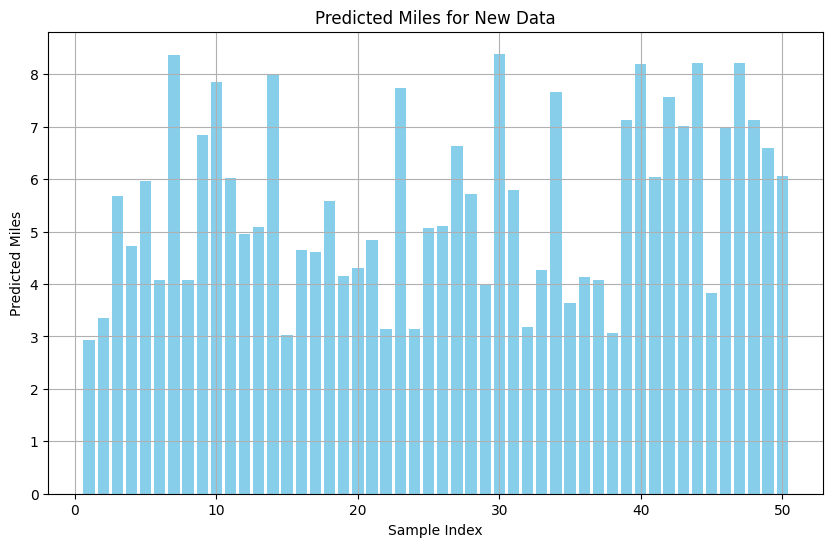

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the plot
plt.figure(figsize=(10, 6))

# Plot the predicted values as a bar chart
plt.bar(range(1, len(predictions) + 1), predictions, color='skyblue')

# Set labels and title
plt.xlabel('Sample Index')
plt.ylabel('Predicted Miles')
plt.title('Predicted Miles for New Data')

# Show gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()